In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

from f_detrend import detrend_fuction

sn.set_style('whitegrid')
%matplotlib inline

In [2]:
def read_table(filename,rescale=1):
    t0 = 2
    t1 = 7
    results_follow = 0
    row_names = []
    table_raw = np.empty(t1-t0)
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if len(words)>1 and words[0] == "Quarter":
            results_follow=1
            colnames = words[t0:t1]
        elif len(words)>1 and words[0] == "Total":
            break
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=int)/rescale))
    table_raw = table_raw[1:,:]
    return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names,dtype=int))

In [3]:
dates = []
for year in range(1987,2022):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:-3]

t0 = 59
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

## Part 1: Stocks

In [4]:
path = './rawtabs_dem/'
states = ['P','T','U','I','A']

stocks_df_f = read_table(path+'stocks_f.log',rescale=100)

stocks_w_df_f = read_table(path+'stocks_w_f.log',rescale=100)

stocks_alt_df_f = read_table(path+'stocks_alt_f.log',rescale=100)

stocks_w_alt_df_f = read_table(path+'stocks_alt_w_f.log',rescale=100)

stocks_df_m = read_table(path+'stocks_m.log',rescale=100)

stocks_w_df_m = read_table(path+'stocks_w_m.log',rescale=100)

stocks_alt_df_m = read_table(path+'stocks_alt_m.log',rescale=100)

stocks_w_alt_df_m = read_table(path+'stocks_alt_w_m.log',rescale=100)

stocks_e_df_f = read_table(path+'stocks_e_f.log',rescale=100)

stocks_w_e_df_f = read_table(path+'stocks_e_w_f.log',rescale=100)

stocks_e_df_m = read_table(path+'stocks_e_m.log',rescale=100)

stocks_w_e_df_m = read_table(path+'stocks_e_w_m.log',rescale=100)

for df in [stocks_df_f,stocks_df_m,stocks_w_df_f,stocks_w_df_m,
           stocks_alt_df_f,stocks_alt_df_m,stocks_w_alt_df_f,stocks_w_alt_df_m,
           stocks_w_e_df_f,stocks_w_e_df_m,stocks_e_df_f,stocks_e_df_m]:
    df['Total'] = df.sum(axis=1)
    for state in states:
        df[state] = df[state]/df['Total']
    df['dates'] = df.index.map(date_dict)

In [5]:
date_cuts_t = ['2005Q1','2008Q1','2013Q1','2016Q1']
date_cuts_t1 = ['2007Q4','2012Q4','2015Q4','2021Q1']
date_cuts = np.vstack((date_cuts_t,date_cuts_t1))

date_cuts_08 = np.vstack((['2005Q1',],['2012Q4',]))

date_cuts_20 = np.vstack((['2016Q1',],['2021Q1',]))

p_stock_ltrend_f,p_stock_predict_f = detrend_fuction(stocks_w_df_f,'P',date_cuts,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_08_f,p_stock_predict_08_f = detrend_fuction(stocks_w_df_f,'P',date_cuts_08,
                                                 date0='2007Q4',dateT='2012Q4',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_20_f,p_stock_predict_20_f = detrend_fuction(stocks_w_df_f,'P',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_20_alt_f,p_stock_predict_20_alt_f = detrend_fuction(stocks_w_alt_df_f,'P',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_20_e_f,p_stock_predict_20_e_f = detrend_fuction(stocks_w_e_df_f,'P',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

p_stock_ltrend_m,p_stock_predict_m = detrend_fuction(stocks_w_df_m,'P',date_cuts,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_08_m,p_stock_predict_08_m = detrend_fuction(stocks_w_df_m,'P',date_cuts_08,
                                                 date0='2007Q4',dateT='2012Q4',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_20_m,p_stock_predict_20_m = detrend_fuction(stocks_w_df_m,'P',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_20_alt_m,p_stock_predict_20_alt_m = detrend_fuction(stocks_w_alt_df_m,'P',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
p_stock_ltrend_20_e_m,p_stock_predict_20_e_m = detrend_fuction(stocks_w_e_df_m,'P',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [6]:
t_stock_ltrend_20_e_f,t_stock_predict_20_e_f = detrend_fuction(stocks_w_e_df_f,'T',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


In [7]:
i_stock_ltrend_20_m,i_stock_predict_20_m = detrend_fuction(stocks_w_df_m,'I',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
i_stock_ltrend_20_alt_m,i_stock_predict_20_alt_m = detrend_fuction(stocks_w_alt_df_m,'I',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
i_stock_ltrend_20_e_m,i_stock_predict_20_e_m = detrend_fuction(stocks_w_e_df_m,'I',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
t_stock_ltrend_20_m,t_stock_predict_20_m = detrend_fuction(stocks_w_df_m,'T',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
t_stock_ltrend_20_alt_m,t_stock_predict_20_alt_m = detrend_fuction(stocks_w_alt_df_m,'T',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
t_stock_ltrend_20_e_m,t_stock_predict_20_e_m = detrend_fuction(stocks_w_e_df_m,'T',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
u_stock_ltrend_20_m,u_stock_predict_20_m = detrend_fuction(stocks_w_df_m,'U',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
u_stock_ltrend_20_alt_m,u_stock_predict_20_alt_m = detrend_fuction(stocks_w_alt_df_m,'U',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
u_stock_ltrend_20_e_m,u_stock_predict_20_e_m = detrend_fuction(stocks_w_e_df_m,'U',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


i_stock_ltrend_20_f,i_stock_predict_20_f = detrend_fuction(stocks_w_df_f,'I',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
i_stock_ltrend_20_alt_f,i_stock_predict_20_alt_f = detrend_fuction(stocks_w_alt_df_f,'I',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
i_stock_ltrend_20_e_f,i_stock_predict_20_e_f = detrend_fuction(stocks_w_e_df_f,'I',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
t_stock_ltrend_20_f,t_stock_predict_20_f = detrend_fuction(stocks_w_df_f,'T',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
t_stock_ltrend_20_alt_f,t_stock_predict_20_alt_f = detrend_fuction(stocks_w_alt_df_f,'T',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
t_stock_ltrend_20_e_f,t_stock_predict_20_e_f = detrend_fuction(stocks_w_e_df_f,'T',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
u_stock_ltrend_20_f,u_stock_predict_20_f = detrend_fuction(stocks_w_df_f,'U',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
u_stock_ltrend_20_alt_f,u_stock_predict_20_alt_f = detrend_fuction(stocks_w_alt_df_f,'U',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
u_stock_ltrend_20_e_f,u_stock_predict_20_e_f = detrend_fuction(stocks_w_e_df_f,'U',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

a_stock_ltrend_20_e_f,a_stock_predict_20_e_f = detrend_fuction(stocks_w_e_df_f,'A',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
a_stock_ltrend_20_e_m,a_stock_predict_20_e_m = detrend_fuction(stocks_w_e_df_m,'A',date_cuts_20,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


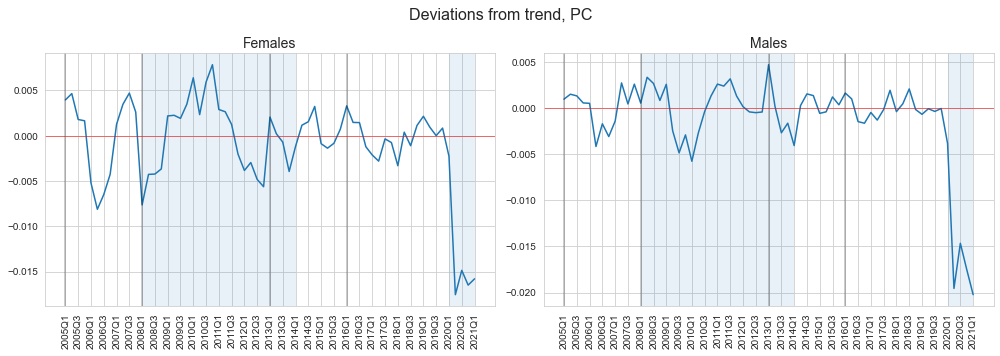

In [8]:
t0 = '2005Q1'
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.suptitle('Deviations from trend, PC',fontsize=16)
plt.subplot(121)
plt.title('Females',fontsize=14)
plt.plot(stocks_w_df_f['dates'],stocks_w_df_f['P']-p_stock_predict_f)

plt.axvspan(date_dict_reverse['2008Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2014Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
plt.axvspan(date_dict_reverse['2020Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2021Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
for dt in date_cuts_t:
    plt.axvline(dt,c='k',lw=0.4)
plt.xticks(stocks_w_df_f['dates'][::2],rotation=90)
plt.axhline(c='r',lw=0.5)
# plt.ylim(-300000,150000)

plt.subplot(122)
plt.title('Males',fontsize=14)
plt.plot(stocks_w_df_m['dates'],stocks_w_df_m['P']-p_stock_predict_m)

plt.axvspan(date_dict_reverse['2008Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2014Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
plt.axvspan(date_dict_reverse['2020Q1']-date_dict_reverse[t0], 
            date_dict_reverse['2021Q1']-date_dict_reverse[t0], color=colors[0], alpha=0.1, lw=0)
for dt in date_cuts_t:
    plt.axvline(dt,c='k',lw=0.4)
plt.xticks(stocks_w_df_f['dates'][::2],rotation=90)
plt.axhline(c='r',lw=0.5)
# plt.ylim(-300000,150000)

plt.tight_layout()
plt.show()

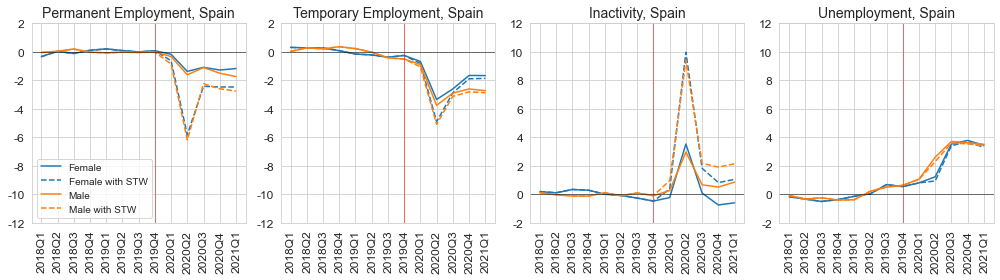

In [23]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q1']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,4))
plt.subplot(141)
plt.title('Permanent Employment, Spain',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['P'].loc[t0:]-p_stock_predict_20_f[t00:],label='Female')
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['P'].loc[t0:]-p_stock_predict_20_alt_f[t00:],
         c=colors[0],ls='--',label='Female with STW')
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['P'].loc[t0:]-p_stock_predict_20_m[t00:],
         c=colors[1],label='Male')
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['P'].loc[t0:]-p_stock_predict_20_alt_m[t00:],
         c=colors[1],ls='--',label='Male with STW')
plt.ylim(-0.1,0.01)
plt.yticks(np.arange(-0.12,0.04,0.02),np.arange(-12,4,2),fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.legend()

plt.subplot(143)
plt.title('Inactivity, Spain',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['I'].loc[t0:]-i_stock_predict_20_f[t00:])
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['I'].loc[t0:]-i_stock_predict_20_alt_f[t00:],
         ls='--',c=colors[0])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['I'].loc[t0:]-i_stock_predict_20_m[t00:],c=colors[1])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['I'].loc[t0:]-i_stock_predict_20_alt_m[t00:],
         c=colors[1],ls='--')
plt.yticks(np.arange(-0.02,0.14,0.02),np.arange(-2,14,2),fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
# plt.xlim(0,T)

plt.subplot(142)
plt.title('Temporary Employment, Spain',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['T'].loc[t0:]-t_stock_predict_20_f[t00:],label='Female')
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['T'].loc[t0:]-t_stock_predict_20_alt_f[t00:],
         ls='--',c=colors[0])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['T'].loc[t0:]-t_stock_predict_20_m[t00:],c=colors[1])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['T'].loc[t0:]-t_stock_predict_20_alt_m[t00:],
         c=colors[1],ls='--',label='Male with STW')
plt.yticks(np.arange(-0.12,0.04,0.02),np.arange(-12,4,2),fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)


plt.subplot(144)
plt.title('Unemployment, Spain',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['U'].loc[t0:]-u_stock_predict_20_f[t00:])
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['U'].loc[t0:]-u_stock_predict_20_alt_f[t00:],
         ls='--',c=colors[0])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['U'].loc[t0:]-u_stock_predict_20_m[t00:],c=colors[1])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['U'].loc[t0:]-u_stock_predict_20_alt_m[t00:],
        c=colors[1],ls='--')
plt.yticks(np.arange(-0.02,0.14,0.02),np.arange(-2,14,2),fontsize=12)
# plt.ylim(-0.01,0.1)
plt.xticks(rotation=90,fontsize=12)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)

plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_sex_norm.pdf',format='pdf',bbox_inches='tight')
plt.show()

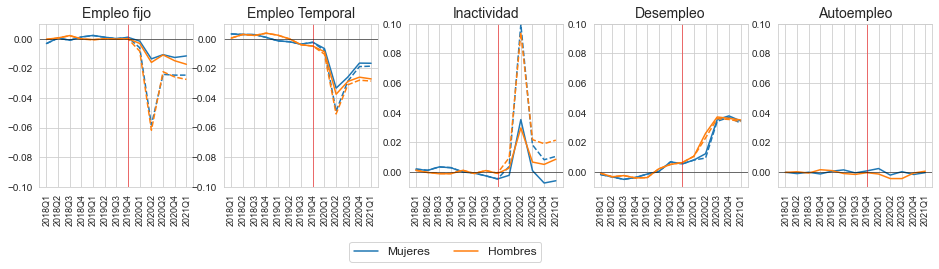

In [43]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2021Q1']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(16,3))
plt.subplot(151)
plt.title('Empleo fijo',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['P'].loc[t0:]-p_stock_predict_20_f[t00:])
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['P'].loc[t0:]-p_stock_predict_20_alt_f[t00:],
         c=colors[0],ls='--')
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['P'].loc[t0:]-p_stock_predict_20_m[t00:],c=colors[1])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['P'].loc[t0:]-p_stock_predict_20_alt_m[t00:],
         c=colors[1],ls='--')
# plt.ylim(-1.6e6,0.2e6)
plt.ylim(-0.1,0.01)
plt.xticks(rotation=90,fontsize=9)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)

plt.subplot(153)
plt.title('Inactividad',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['I'].loc[t0:]-i_stock_predict_20_f[t00:])
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['I'].loc[t0:]-i_stock_predict_20_alt_f[t00:],
         ls='--',c=colors[0])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['I'].loc[t0:]-i_stock_predict_20_m[t00:],c=colors[1])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['I'].loc[t0:]-i_stock_predict_20_alt_m[t00:],
         c=colors[1],ls='--')
plt.ylim(-0.01,0.1)
# plt.ylim(-0.2e6,1.6e6)
plt.xticks(rotation=90,fontsize=9)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
# plt.xlim(0,T)

plt.subplot(152)
plt.title('Empleo Temporal',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['T'].loc[t0:]-t_stock_predict_20_f[t00:])
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['T'].loc[t0:]-t_stock_predict_20_alt_f[t00:],
         ls='--',c=colors[0])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['T'].loc[t0:]-t_stock_predict_20_m[t00:],c=colors[1])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['T'].loc[t0:]-t_stock_predict_20_alt_m[t00:],
         c=colors[1],ls='--')
# plt.ylim(-1.6e6,0.2e6)
plt.ylim(-0.1,0.01)
plt.xticks(rotation=90,fontsize=9)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)

plt.subplot(154)
plt.title('Desempleo',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_alt_df_f['U'].loc[t0:]-u_stock_predict_20_f[t00:])
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['U'].loc[t0:]-u_stock_predict_20_alt_f[t00:],
         ls='--',c=colors[0])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_alt_df_m['U'].loc[t0:]-u_stock_predict_20_m[t00:],c=colors[1])
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['U'].loc[t0:]-u_stock_predict_20_alt_m[t00:],
        c=colors[1],ls='--')
# plt.ylim(-0.2e6,0.8e6)
plt.ylim(-0.01,0.1)
plt.xticks(rotation=90,fontsize=9)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)

plt.subplot(155)
plt.title('Autoempleo',fontsize=14)
plt.plot(stocks_w_df_f['dates'].loc[t0:],stocks_w_e_df_f['A'].loc[t0:]-a_stock_predict_20_e_f[t00:],c=colors[0],label='Mujeres')
plt.plot(stocks_w_df_m['dates'].loc[t0:],stocks_w_e_df_m['A'].loc[t0:]-a_stock_predict_20_e_m[t00:],c=colors[1],label='Hombres')
# plt.ylim(-0.2e6,0.8e6)
plt.legend(fontsize=12,ncol=2,loc='best',bbox_to_anchor=(-1.5,-0.3))
plt.ylim(-0.01,0.1)
plt.xticks(rotation=90,fontsize=9)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)

# plt.tight_layout()
plt.savefig('./plots/spain_stocks_detrend_sex_norm.png',format='png',bbox_inches='tight')
plt.show()

## Part 2: Flows

In [30]:
path = './rawtabs_dem/'
states = ['P','T','U','I','A']
dfs = []
dfs_a = []
dfs_raw = []
dfs_raw_a = []
dfs_e = []
dfs_raw_e = []

for s in states:
    tbuff = read_table(path+'flows_{}_m.log'.format(s))
    tbuff['Total'] = tbuff.sum(axis=1).values
    tbuff['dates'] = tbuff.index.map(date_dict)
    tbuff_raw = tbuff.copy()
    for s1 in states:
        tbuff[s+s1] = tbuff[s+s1]/tbuff['Total']
        tbuff_raw[s+s1] = tbuff_raw[s+s1]/stocks_df_m['Total']
    
    dfs.append(tbuff)
    dfs_raw.append(tbuff_raw)

flows_p_m,flows_t_m,flows_u_m,flows_i_m,flows_a_m = dfs
flows_p_m_raw,flows_t_m_raw,flows_u_m_raw,flows_i_m_raw,flows_a_m_raw = dfs_raw

states_a = ['P','T','U','I']
for s in states_a:
    tbuff = read_table(path+'flows_{}_alt_m.log'.format(s))
    tbuff['Total'] = tbuff.sum(axis=1).values
    tbuff['dates'] = tbuff.index.map(date_dict)
    tbuff_raw = tbuff.copy()
    for s1 in states_a:
        tbuff[s+s1] = tbuff[s+s1]/tbuff['Total']
        tbuff_raw[s+s1] = tbuff_raw[s+s1]/stocks_alt_df_m['Total']
    
    dfs_a.append(tbuff)
    dfs_raw_a.append(tbuff_raw)
    
states_e = ['P','T','U','I']
for s in states_a:
    tbuff = read_table(path+'flows_{}_e_m.log'.format(s))
    tbuff['Total'] = tbuff.sum(axis=1).values
    tbuff['dates'] = tbuff.index.map(date_dict)
    tbuff_raw = tbuff.copy()
    for s1 in states_a:
        tbuff[s+s1] = tbuff[s+s1]/tbuff['Total']
        tbuff_raw[s+s1] = tbuff_raw[s+s1]/stocks_e_df_m['Total']
    
    dfs_e.append(tbuff)
    dfs_raw_e.append(tbuff_raw)

flows_p_alt_m,flows_t_alt_m,flows_u_alt_m,flows_i_alt_m = dfs_a
flows_p_m_raw,flows_t_m_raw,flows_u_m_raw,flows_i_m_raw = dfs_raw_a
flows_p_e_m,flows_t_e_m,flows_u_e_m,flows_i_e_m = dfs_e
flows_p_e_m_raw,flows_t_e_m_raw,flows_u_e_m_raw,flows_i_e_m_raw = dfs_raw_e

In [63]:
path = './rawtabs_dem/'
states = ['P','T','U','I','A']
dfs = []
dfs_a = []
dfs_raw = []
dfs_raw_a = []
dfs_e = []
dfs_raw_e = []

for s in states:
    tbuff = read_table(path+'flows_{}_f.log'.format(s))
    tbuff['Total'] = tbuff.sum(axis=1).values
    tbuff['dates'] = tbuff.index.map(date_dict)
    tbuff_raw = tbuff.copy()
    for s1 in states:
        tbuff[s+s1] = tbuff[s+s1]/tbuff['Total']
        tbuff_raw[s+s1] = tbuff_raw[s+s1]/stocks_df_f['Total']
    
    dfs.append(tbuff)
    dfs_raw.append(tbuff_raw)

flows_p_f,flows_t_f,flows_u_f,flows_i_f,flows_a_f = dfs
flows_p_f_raw,flows_t_f_raw,flows_u_f_raw,flows_i_f_raw,flows_a_f_raw = dfs_raw

states_a = ['P','T','U','I']
for s in states_a:
    tbuff = read_table(path+'flows_{}_alt_f.log'.format(s))
    tbuff['Total'] = tbuff.sum(axis=1).values
    tbuff['dates'] = tbuff.index.map(date_dict)
    tbuff_raw = tbuff.copy()
    for s1 in states_a:
        tbuff[s+s1] = tbuff[s+s1]/tbuff['Total']
        tbuff_raw[s+s1] = tbuff_raw[s+s1]/stocks_alt_df_f['Total']
    
    dfs_a.append(tbuff)
    dfs_raw_a.append(tbuff_raw)

flows_p_alt_f,flows_t_alt_f,flows_u_alt_f,flows_i_alt_f = dfs_a
flows_p_alt_f_raw,flows_t_alt_f_raw,flows_u_alt_f_raw,flows_i_alt_f_raw = dfs_raw_a

states_e = ['P','T','U','I']
for s in states_a:
    tbuff = read_table(path+'flows_{}_e_f.log'.format(s))
    tbuff['Total'] = tbuff.sum(axis=1).values
    tbuff['dates'] = tbuff.index.map(date_dict)
    tbuff_raw = tbuff.copy()
    for s1 in states_a:
        tbuff[s+s1] = tbuff[s+s1]/tbuff['Total']
        tbuff_raw[s+s1] = tbuff_raw[s+s1]/stocks_e_df_f['Total']
    
    dfs_e.append(tbuff)
    dfs_raw_e.append(tbuff_raw)

flows_p_alt_f,flows_t_alt_f,flows_u_alt_f,flows_i_alt_f = dfs_a
flows_p_f_raw,flows_t_f_raw,flows_u_f_raw,flows_i_f_raw = dfs_raw_a
flows_p_e_f,flows_t_e_f,flows_u_e_f,flows_i_e_f = dfs_e
flows_p_e_f_raw,flows_t_e_f_raw,flows_u_e_f_raw,flows_i_e_f_raw = dfs_raw_e

In [64]:
date_cuts_t = ['2005Q1','2008Q1','2013Q1','2016Q1']
date_cuts_t1 = ['2007Q4','2012Q4','2015Q4','2021Q1']
date_cuts = np.vstack((date_cuts_t,date_cuts_t1))

date_cuts_08 = np.vstack((['2005Q1',],['2012Q4',]))

date_cuts_20_m = np.vstack((['2016Q1',],['2021Q1',]))

# p_flow_ltrend,p_flow_predict = detrend_fuction(flows_w_df,'P',date_cuts,
#                                                  date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
# p_flow_ltrend_08,p_flow_predict_08 = detrend_fuction(flows_w_df,'P',date_cuts_08,
#                                                  date0='2007Q4',dateT='2012Q4',date_dict=date_dict_reverse_ciclo)

p_flow_ltrend_20_m,p_flow_predict_20_m = detrend_fuction(flows_p_m,'PP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

p_flow_ltrend_20_m_alt,p_flow_predict_20_m_alt = detrend_fuction(flows_p_alt_m,'PP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_ltrend_20_m,pi_flow_predict_20_m = detrend_fuction(flows_p_m,'PI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_ltrend_20_m_alt,pi_flow_predict_20_m_alt = detrend_fuction(flows_p_alt_m,'PI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_ltrend_20_m,pu_flow_predict_20_m = detrend_fuction(flows_p_m,'PU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_ltrend_20_m_alt,pu_flow_predict_20_m_alt = detrend_fuction(flows_p_alt_m,'PU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pt_flow_ltrend_20_m,pt_flow_predict_20_m = detrend_fuction(flows_p_m,'PT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pt_flow_ltrend_20_m_alt,pt_flow_predict_20_m_alt = detrend_fuction(flows_p_alt_m,'PT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

p_flow_ltrend_20_m_e,p_flow_predict_20_m_e = detrend_fuction(flows_p_e_m,'PP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_ltrend_20_m_e,pi_flow_predict_20_m_e = detrend_fuction(flows_p_e_m,'PI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_ltrend_20_m_e,pu_flow_predict_20_m_e = detrend_fuction(flows_p_e_m,'PU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pt_flow_ltrend_20_m_e,pt_flow_predict_20_m_e = detrend_fuction(flows_p_e_m,'PT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [65]:
date_cuts_t = ['2005Q1','2008Q1','2013Q1','2016Q1']
date_cuts_t1 = ['2007Q4','2012Q4','2015Q4','2021Q1']
date_cuts = np.vstack((date_cuts_t,date_cuts_t1))

date_cuts_08 = np.vstack((['2005Q1',],['2012Q4',]))

date_cuts_20_f = np.vstack((['2016Q1',],['2021Q1',]))

# p_flow_ltrend,p_flow_predict = detrend_fuction(flows_w_df,'P',date_cuts,
#                                                  date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
# p_flow_ltrend_08,p_flow_predict_08 = detrend_fuction(flows_w_df,'P',date_cuts_08,
#                                                  date0='2007Q4',dateT='2012Q4',date_dict=date_dict_reverse_ciclo)

p_flow_ltrend_20_f,p_flow_predict_20_f = detrend_fuction(flows_p_f,'PP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

p_flow_ltrend_20_f_alt,p_flow_predict_20_f_alt = detrend_fuction(flows_p_alt_f,'PP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_ltrend_20_f,pi_flow_predict_20_f = detrend_fuction(flows_p_f,'PI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_ltrend_20_f_alt,pi_flow_predict_20_f_alt = detrend_fuction(flows_p_alt_f,'PI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_ltrend_20_f,pu_flow_predict_20_f = detrend_fuction(flows_p_f,'PU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_ltrend_20_f_alt,pu_flow_predict_20_f_alt = detrend_fuction(flows_p_alt_f,'PU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pt_flow_ltrend_20_f,pt_flow_predict_20_f = detrend_fuction(flows_p_f,'PT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pt_flow_ltrend_20_f_alt,pt_flow_predict_20_f_alt = detrend_fuction(flows_p_alt_f,'PT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

p_flow_ltrend_20_f_e,p_flow_predict_20_f_e = detrend_fuction(flows_p_e_f,'PP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_ltrend_20_f_e,pi_flow_predict_20_f_e = detrend_fuction(flows_p_e_f,'PI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_ltrend_20_f_e,pu_flow_predict_20_f_e = detrend_fuction(flows_p_e_f,'PU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pt_flow_ltrend_20_f_e,pt_flow_predict_20_f_e = detrend_fuction(flows_p_e_f,'PT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [66]:
t_flow_ltrend_20_m,t_flow_predict_20_m = detrend_fuction(flows_t_m,'TT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

t_flow_ltrend_20_m_alt,t_flow_predict_20_m_alt = detrend_fuction(flows_t_alt_m,'TT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_ltrend_20_m,ti_flow_predict_20_m = detrend_fuction(flows_t_m,'TI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_ltrend_20_m_alt,ti_flow_predict_20_m_alt = detrend_fuction(flows_t_alt_m,'TI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_ltrend_20_m,tu_flow_predict_20_m = detrend_fuction(flows_t_m,'TU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_ltrend_20_m_alt,tu_flow_predict_20_m_alt = detrend_fuction(flows_t_alt_m,'TU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tp_flow_ltrend_20_m,tp_flow_predict_20_m = detrend_fuction(flows_t_m,'TP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tp_flow_ltrend_20_m_alt,tp_flow_predict_20_m_alt = detrend_fuction(flows_t_alt_m,'TP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

t_flow_ltrend_20_m_e,t_flow_predict_20_m_e = detrend_fuction(flows_t_e_m,'TT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_ltrend_20_m_e,ti_flow_predict_20_m_e = detrend_fuction(flows_t_e_m,'TI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_ltrend_20_m_e,tu_flow_predict_20_m_e = detrend_fuction(flows_t_e_m,'TU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tp_flow_ltrend_20_m_e,tp_flow_predict_20_m_e = detrend_fuction(flows_t_e_m,'TP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [67]:
t_flow_ltrend_20_f,t_flow_predict_20_f = detrend_fuction(flows_t_f,'TT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

t_flow_ltrend_20_f_alt,t_flow_predict_20_f_alt = detrend_fuction(flows_t_alt_f,'TT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_ltrend_20_f,ti_flow_predict_20_f = detrend_fuction(flows_t_f,'TI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_ltrend_20_f_alt,ti_flow_predict_20_f_alt = detrend_fuction(flows_t_alt_f,'TI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_ltrend_20_f,tu_flow_predict_20_f = detrend_fuction(flows_t_f,'TU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_ltrend_20_f_alt,tu_flow_predict_20_f_alt = detrend_fuction(flows_t_alt_f,'TU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tp_flow_ltrend_20_f,tp_flow_predict_20_f = detrend_fuction(flows_t_f,'TP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tp_flow_ltrend_20_f_alt,tp_flow_predict_20_f_alt = detrend_fuction(flows_t_alt_f,'TP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

t_flow_ltrend_20_f_e,t_flow_predict_20_f_e = detrend_fuction(flows_t_e_f,'TT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_ltrend_20_f_e,ti_flow_predict_20_f_e = detrend_fuction(flows_t_e_f,'TI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_ltrend_20_f_e,tu_flow_predict_20_f_e = detrend_fuction(flows_t_e_f,'TU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tp_flow_ltrend_20_f_e,tp_flow_predict_20_f_e = detrend_fuction(flows_t_e_f,'TP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [68]:
i_flow_ltrend_20_m,i_flow_predict_20_m = detrend_fuction(flows_i_m,'II',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

i_flow_ltrend_20_m_alt,i_flow_predict_20_m_alt = detrend_fuction(flows_i_alt_m,'II',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_ltrend_20_m,ip_flow_predict_20_m = detrend_fuction(flows_i_m,'IP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_ltrend_20_m_alt,ip_flow_predict_20_m_alt = detrend_fuction(flows_i_alt_m,'IP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


iu_flow_ltrend_20_m,iu_flow_predict_20_m = detrend_fuction(flows_i_m,'IU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_ltrend_20_m_alt,iu_flow_predict_20_m_alt = detrend_fuction(flows_i_alt_m,'IU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_ltrend_20_m,it_flow_predict_20_m = detrend_fuction(flows_i_m,'IT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_ltrend_20_m_alt,it_flow_predict_20_m_alt = detrend_fuction(flows_i_alt_m,'IT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


i_flow_ltrend_20_m_e,i_flow_predict_20_m_e = detrend_fuction(flows_i_e_m,'II',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_ltrend_20_m_e,ip_flow_predict_20_m_e = detrend_fuction(flows_i_e_m,'IP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_ltrend_20_m_e,iu_flow_predict_20_m_e = detrend_fuction(flows_i_e_m,'IU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_ltrend_20_m_e,it_flow_predict_20_m_e = detrend_fuction(flows_i_e_m,'IT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [69]:
i_flow_ltrend_20_f,i_flow_predict_20_f = detrend_fuction(flows_i_f,'II',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

i_flow_ltrend_20_f_alt,i_flow_predict_20_f_alt = detrend_fuction(flows_i_alt_f,'II',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_ltrend_20_f,ip_flow_predict_20_f = detrend_fuction(flows_i_f,'IP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_ltrend_20_f_alt,ip_flow_predict_20_f_alt = detrend_fuction(flows_i_alt_f,'IP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


iu_flow_ltrend_20_f,iu_flow_predict_20_f = detrend_fuction(flows_i_f,'IU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_ltrend_20_f_alt,iu_flow_predict_20_f_alt = detrend_fuction(flows_i_alt_f,'IU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_ltrend_20_f,it_flow_predict_20_f = detrend_fuction(flows_i_f,'IT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_ltrend_20_f_alt,it_flow_predict_20_f_alt = detrend_fuction(flows_i_alt_f,'IT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

i_flow_ltrend_20_f_e,i_flow_predict_20_f_e = detrend_fuction(flows_i_e_f,'II',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_ltrend_20_f_e,ip_flow_predict_20_f_e = detrend_fuction(flows_i_e_f,'IP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_ltrend_20_f_e,iu_flow_predict_20_f_e = detrend_fuction(flows_i_e_f,'IU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_ltrend_20_f_e,it_flow_predict_20_f_e = detrend_fuction(flows_i_e_f,'IT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [70]:
u_flow_ltrend_20_m,u_flow_predict_20_m = detrend_fuction(flows_u_m,'UU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
up_flow_ltrend_20_m,up_flow_predict_20_m = detrend_fuction(flows_u_m,'UP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_ltrend_20_m,ui_flow_predict_20_m = detrend_fuction(flows_u_m,'UI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
ut_flow_ltrend_20_m,ut_flow_predict_20_m = detrend_fuction(flows_u_m,'UT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

u_flow_ltrend_20_m_alt,u_flow_predict_20_m_alt = detrend_fuction(flows_u_alt_m,'UU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
up_flow_ltrend_20_m_alt,up_flow_predict_20_m_alt = detrend_fuction(flows_u_alt_m,'UP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_ltrend_20_m_alt,ui_flow_predict_20_m_alt = detrend_fuction(flows_u_alt_m,'UI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
ut_flow_ltrend_20_m_alt,ut_flow_predict_20_m_alt = detrend_fuction(flows_u_alt_m,'UT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

u_flow_ltrend_20_m_e,u_flow_predict_20_m_e = detrend_fuction(flows_u_e_m,'UU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
up_flow_ltrend_20_m_e,up_flow_predict_20_m_e = detrend_fuction(flows_u_e_m,'UP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_ltrend_20_m_e,ui_flow_predict_20_m_e = detrend_fuction(flows_u_e_m,'UI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
ut_flow_ltrend_20_m_e,ut_flow_predict_20_m_e = detrend_fuction(flows_u_e_m,'UT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [71]:
u_flow_ltrend_20_f,u_flow_predict_20_f = detrend_fuction(flows_u_f,'UU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
up_flow_ltrend_20_f,up_flow_predict_20_f = detrend_fuction(flows_u_f,'UP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_ltrend_20_f,ui_flow_predict_20_f = detrend_fuction(flows_u_f,'UI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
ut_flow_ltrend_20_f,ut_flow_predict_20_f = detrend_fuction(flows_u_f,'UT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

u_flow_ltrend_20_f_alt,u_flow_predict_20_f_alt = detrend_fuction(flows_u_alt_f,'UU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
up_flow_ltrend_20_f_alt,up_flow_predict_20_f_alt = detrend_fuction(flows_u_alt_f,'UP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_ltrend_20_f_alt,ui_flow_predict_20_f_alt = detrend_fuction(flows_u_alt_f,'UI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
ut_flow_ltrend_20_f_alt,ut_flow_predict_20_f_alt = detrend_fuction(flows_u_alt_f,'UT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

u_flow_ltrend_20_f_e,u_flow_predict_20_f_e = detrend_fuction(flows_u_e_f,'UU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
up_flow_ltrend_20_f_e,up_flow_predict_20_f_e = detrend_fuction(flows_u_e_f,'UP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_ltrend_20_f_e,ui_flow_predict_20_f_e = detrend_fuction(flows_u_e_f,'UI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)
ut_flow_ltrend_20_f_e,ut_flow_predict_20_f_e = detrend_fuction(flows_u_e_f,'UT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

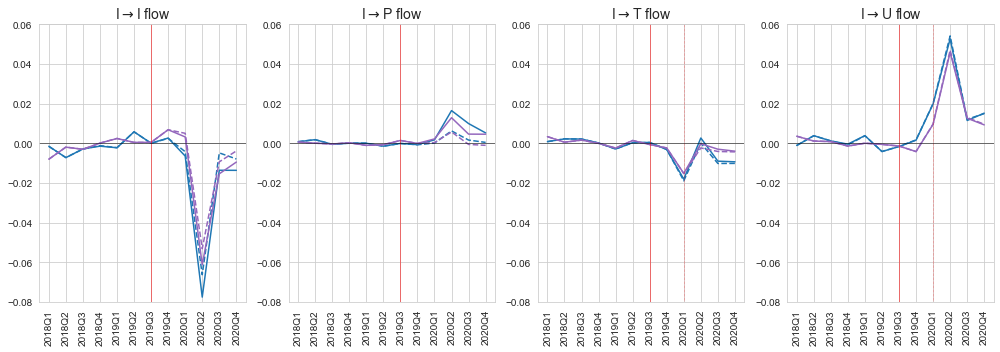

In [72]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'I$\rightarrow$I flow',fontsize=14)
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_m['II'].loc[t0:]-i_flow_predict_20_m[t00:])
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['II'].loc[t0:]-i_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_f['II'].loc[t0:]-i_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['II'].loc[t0:]-i_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)

plt.subplot(142)
plt.title(r'I$\rightarrow$P flow',fontsize=14)
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_m['IP'].loc[t0:]-ip_flow_predict_20_m[t00:])
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IP'].loc[t0:]-ip_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_f['IP'].loc[t0:]-ip_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IP'].loc[t0:]-ip_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)

plt.subplot(143)
plt.title(r'I$\rightarrow$T flow',fontsize=14)
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_m['IT'].loc[t0:]-it_flow_predict_20_m[t00:])
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IT'].loc[t0:]-it_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_f['IT'].loc[t0:]-it_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IT'].loc[t0:]-it_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)

plt.subplot(144)
plt.title(r'I$\rightarrow$U flow',fontsize=14)
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_m['IU'].loc[t0:]-iu_flow_predict_20_m[t00:])
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IU'].loc[t0:]-iu_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_f['IU'].loc[t0:]-iu_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IU'].loc[t0:]-iu_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)

plt.tight_layout()
plt.show()

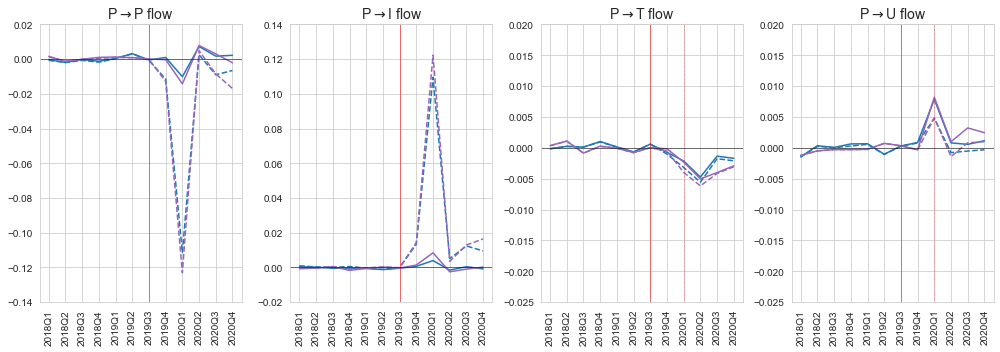

In [45]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'P$\rightarrow$P flow',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PP'].loc[t0:]-p_flow_predict_20_m[t00:])
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_e_m['PP'].loc[t0:]-p_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PP'].loc[t0:]-p_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_e_f['PP'].loc[t0:]-p_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.14,0.02)

plt.subplot(142)
plt.title(r'P$\rightarrow$I flow',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PI'].loc[t0:]-pi_flow_predict_20_m[t00:])
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_e_m['PI'].loc[t0:]-pi_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PI'].loc[t0:]-pi_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_e_f['PI'].loc[t0:]-pi_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.02,0.14)

plt.subplot(143)
plt.title(r'P$\rightarrow$T flow',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PT'].loc[t0:]-pt_flow_predict_20_m[t00:])
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_e_m['PT'].loc[t0:]-pt_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PT'].loc[t0:]-pt_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_e_f['PT'].loc[t0:]-pt_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.025,0.02)
# plt.ylim(-0.14,0.14)

plt.subplot(144)
plt.title(r'P$\rightarrow$U flow',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PU'].loc[t0:]-pu_flow_predict_20_m[t00:])
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_e_m['PU'].loc[t0:]-pu_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PU'].loc[t0:]-pu_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_e_f['PU'].loc[t0:]-pu_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.025,0.02)
# plt.ylim(-0.14,0.14)

plt.tight_layout()
plt.show()

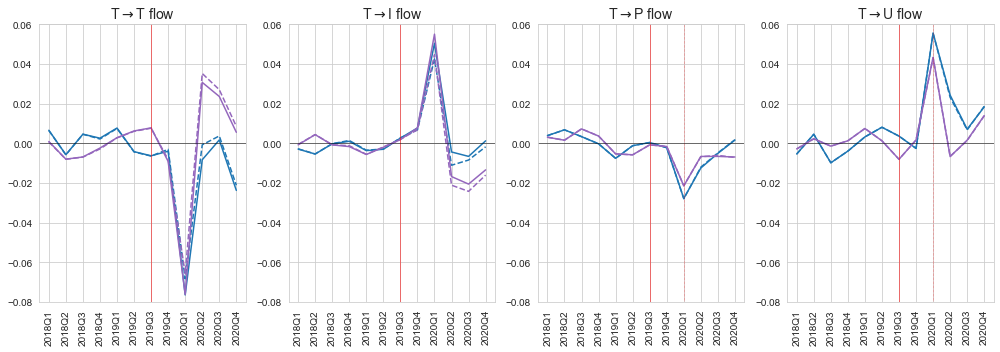

In [46]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'T$\rightarrow$T flow',fontsize=14)
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_m['TT'].loc[t0:]-t_flow_predict_20_m[t00:])
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_alt_m['TT'].loc[t0:]-t_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_f['TT'].loc[t0:]-t_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_alt_f['TT'].loc[t0:]-t_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)

plt.subplot(142)
plt.title(r'T$\rightarrow$I flow',fontsize=14)
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_m['TI'].loc[t0:]-ti_flow_predict_20_m[t00:])
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_alt_m['TI'].loc[t0:]-ti_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_f['TI'].loc[t0:]-ti_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_alt_f['TI'].loc[t0:]-ti_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)

plt.subplot(143)
plt.title(r'T$\rightarrow$P flow',fontsize=14)
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_m['TP'].loc[t0:]-tp_flow_predict_20_m[t00:])
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_alt_m['TP'].loc[t0:]-tp_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_f['TP'].loc[t0:]-tp_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_alt_f['TP'].loc[t0:]-tp_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)


plt.subplot(144)
plt.title(r'T$\rightarrow$U flow',fontsize=14)
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_m['TU'].loc[t0:]-tu_flow_predict_20_m[t00:])
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_alt_m['TU'].loc[t0:]-tu_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_f['TU'].loc[t0:]-tu_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_alt_f['TU'].loc[t0:]-tu_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.08,0.06)

plt.tight_layout()
plt.show()

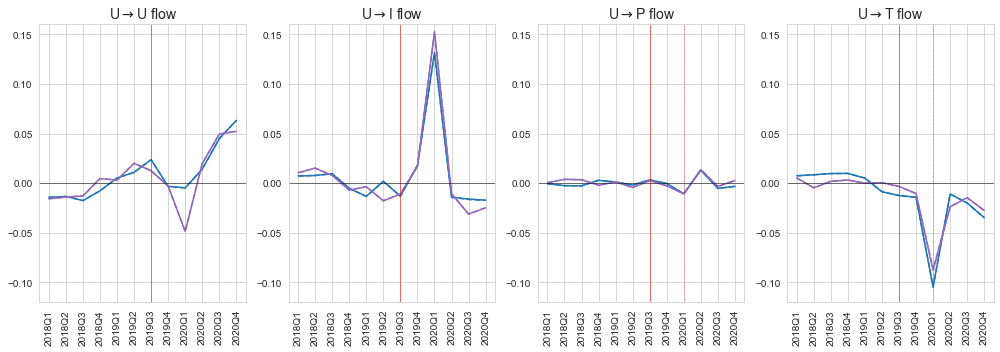

In [47]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
U = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'U$\rightarrow$U flow',fontsize=14)
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_m['UU'].loc[t0:]-u_flow_predict_20_m[t00:])
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UU'].loc[t0:]-u_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_f['UU'].loc[t0:]-u_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_alt_f['UU'].loc[t0:]-u_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)

plt.subplot(142)
plt.title(r'U$\rightarrow$I flow',fontsize=14)
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_m['UI'].loc[t0:]-ui_flow_predict_20_m[t00:])
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UI'].loc[t0:]-ui_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_f['UI'].loc[t0:]-ui_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_alt_f['UI'].loc[t0:]-ui_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)

plt.subplot(143)
plt.title(r'U$\rightarrow$P flow',fontsize=14)
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_m['UP'].loc[t0:]-up_flow_predict_20_m[t00:])
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UP'].loc[t0:]-up_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_f['UP'].loc[t0:]-up_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_alt_f['UP'].loc[t0:]-up_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)


plt.subplot(144)
plt.title(r'U$\rightarrow$T flow',fontsize=14)
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_m['UT'].loc[t0:]-ut_flow_predict_20_m[t00:])
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UT'].loc[t0:]-ut_flow_predict_20_m_alt[t00:],c=colors[0],ls='--')
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_f['UT'].loc[t0:]-ut_flow_predict_20_f[t00:],c=colors[4])
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_alt_f['UT'].loc[t0:]-ut_flow_predict_20_f_alt[t00:],c=colors[4],ls='--')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axvline(dt_bot,c='r',lw=0.5,ls=':')
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)

plt.tight_layout()
plt.show()

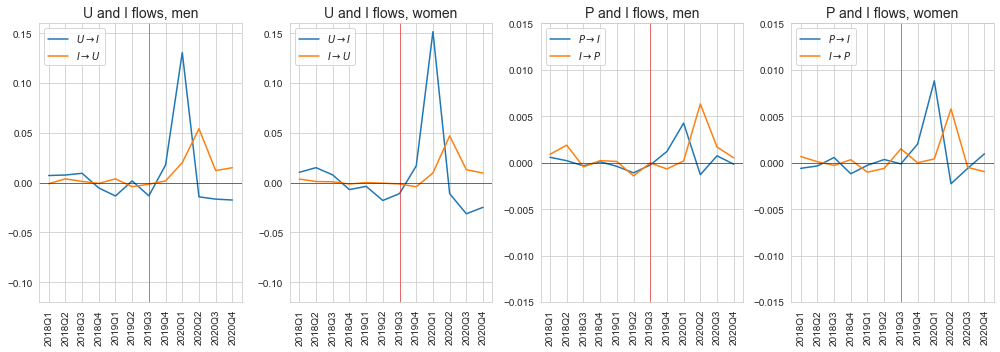

In [48]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
U = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'U and I flows, men',fontsize=14)
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UI'].loc[t0:]-ui_flow_predict_20_m_alt[t00:],
         label=r"$U \rightarrow I$")
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IU'].loc[t0:]-iu_flow_predict_20_m_alt[t00:],
         label=r"$I \rightarrow U$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)
plt.legend(loc='upper left')

plt.subplot(142)
plt.title(r'U and I flows, women',fontsize=14)
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_alt_f['UI'].loc[t0:]-ui_flow_predict_20_f_alt[t00:],
        label=r"$U \rightarrow I$")
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IU'].loc[t0:]-iu_flow_predict_20_f_alt[t00:],
        label=r"$I \rightarrow U$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)
plt.legend(loc='upper left')

plt.subplot(143)
plt.title(r'P and I flows, men',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PI'].loc[t0:]-pi_flow_predict_20_m_alt[t00:],
        label=r"$P \rightarrow I$")
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IP'].loc[t0:]-ip_flow_predict_20_m_alt[t00:],
        label=r"$I \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')


plt.subplot(144)
plt.title(r'P and I flows, women',fontsize=14)
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PI'].loc[t0:]-pi_flow_predict_20_f_alt[t00:],
        label=r"$P \rightarrow I$")
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IP'].loc[t0:]-ip_flow_predict_20_f_alt[t00:],
        label=r"$I \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

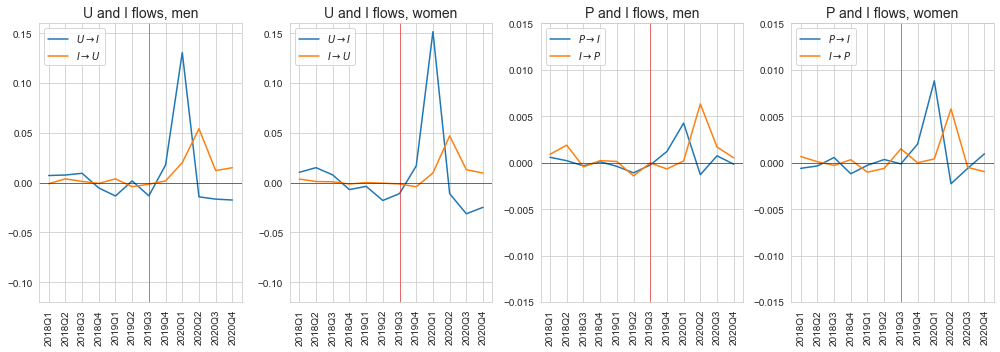

In [49]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
U = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'U and I flows, men',fontsize=14)
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UI'].loc[t0:]-ui_flow_predict_20_m_alt[t00:],
         label=r"$U \rightarrow I$")
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IU'].loc[t0:]-iu_flow_predict_20_m_alt[t00:],
         label=r"$I \rightarrow U$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)
plt.legend(loc='upper left')

plt.subplot(142)
plt.title(r'U and I flows, women',fontsize=14)
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_alt_f['UI'].loc[t0:]-ui_flow_predict_20_f_alt[t00:],
        label=r"$U \rightarrow I$")
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IU'].loc[t0:]-iu_flow_predict_20_f_alt[t00:],
        label=r"$I \rightarrow U$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.12,0.16)
plt.legend(loc='upper left')

plt.subplot(143)
plt.title(r'P and I flows, men',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PI'].loc[t0:]-pi_flow_predict_20_m_alt[t00:],
        label=r"$P \rightarrow I$")
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IP'].loc[t0:]-ip_flow_predict_20_m_alt[t00:],
        label=r"$I \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')


plt.subplot(144)
plt.title(r'P and I flows, women',fontsize=14)
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PI'].loc[t0:]-pi_flow_predict_20_f_alt[t00:],
        label=r"$P \rightarrow I$")
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IP'].loc[t0:]-ip_flow_predict_20_f_alt[t00:],
        label=r"$I \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

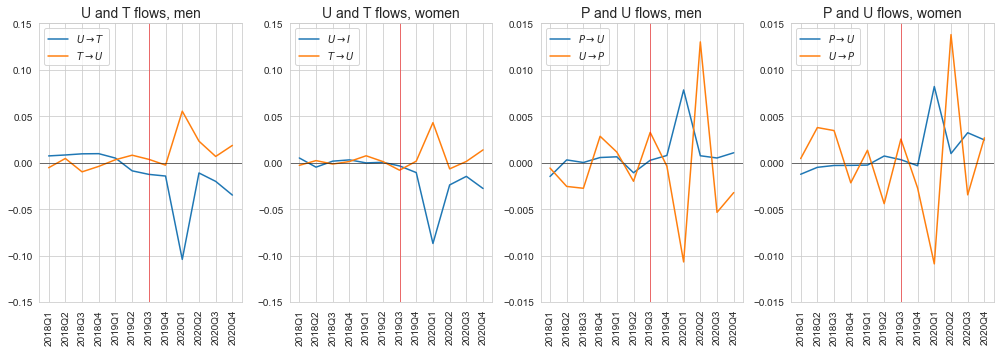

In [50]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
U = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'U and T flows, men',fontsize=14)
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UT'].loc[t0:]-ut_flow_predict_20_m_alt[t00:],
         label=r"$U \rightarrow T$")
plt.plot(flows_i_m['dates'].loc[t0:],flows_t_alt_m['TU'].loc[t0:]-tu_flow_predict_20_m_alt[t00:],
         label=r"$T \rightarrow U$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.15,0.15)
plt.legend(loc='upper left')

plt.subplot(142)
plt.title(r'U and T flows, women',fontsize=14)
plt.plot(flows_u_f['dates'].loc[t0:],flows_u_alt_f['UT'].loc[t0:]-ut_flow_predict_20_f_alt[t00:],
        label=r"$U \rightarrow I$")
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_alt_f['TU'].loc[t0:]-tu_flow_predict_20_f_alt[t00:],
        label=r"$T \rightarrow U$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.15,0.15)
plt.legend(loc='upper left')

plt.subplot(143)
plt.title(r'P and U flows, men',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PU'].loc[t0:]-pu_flow_predict_20_m_alt[t00:],
        label=r"$P \rightarrow U$")
plt.plot(flows_u_m['dates'].loc[t0:],flows_u_alt_m['UP'].loc[t0:]-up_flow_predict_20_m_alt[t00:],
        label=r"$U \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')


plt.subplot(144)
plt.title(r'P and U flows, women',fontsize=14)
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PU'].loc[t0:]-pu_flow_predict_20_f_alt[t00:],
        label=r"$P \rightarrow U$")
plt.plot(flows_i_f['dates'].loc[t0:],flows_u_alt_f['UP'].loc[t0:]-up_flow_predict_20_f_alt[t00:],
        label=r"$U \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

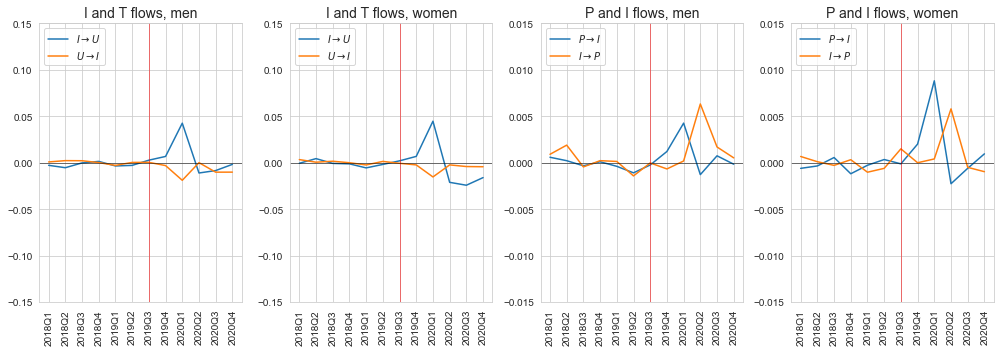

In [51]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
U = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = U - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(141)
plt.title(r'I and T flows, men',fontsize=14)
plt.plot(flows_t_m['dates'].loc[t0:],flows_t_alt_m['TI'].loc[t0:]-ti_flow_predict_20_m_alt[t00:],
         label=r"$I \rightarrow U$")
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IT'].loc[t0:]-it_flow_predict_20_m_alt[t00:],
         label=r"$U \rightarrow I$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.15,0.15)
plt.legend(loc='upper left')

plt.subplot(142)
plt.title(r'I and T flows, women',fontsize=14)
plt.plot(flows_t_f['dates'].loc[t0:],flows_t_alt_f['TI'].loc[t0:]-ti_flow_predict_20_f_alt[t00:],
         label=r"$I \rightarrow U$")
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IT'].loc[t0:]-it_flow_predict_20_f_alt[t00:],
         label=r"$U \rightarrow I$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.15,0.15)
plt.legend(loc='upper left')

plt.subplot(143)
plt.title(r'P and I flows, men',fontsize=14)
plt.plot(flows_p_m['dates'].loc[t0:],flows_p_alt_m['PI'].loc[t0:]-pi_flow_predict_20_m_alt[t00:],
        label=r"$P \rightarrow I$")
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_alt_m['IP'].loc[t0:]-ip_flow_predict_20_m_alt[t00:],
        label=r"$I \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')


plt.subplot(144)
plt.title(r'P and I flows, women',fontsize=14)
plt.plot(flows_p_f['dates'].loc[t0:],flows_p_alt_f['PI'].loc[t0:]-pi_flow_predict_20_f_alt[t00:],
        label=r"$P \rightarrow I$")
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_alt_f['IP'].loc[t0:]-ip_flow_predict_20_f_alt[t00:],
        label=r"$I \rightarrow P$")
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.015,0.015)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

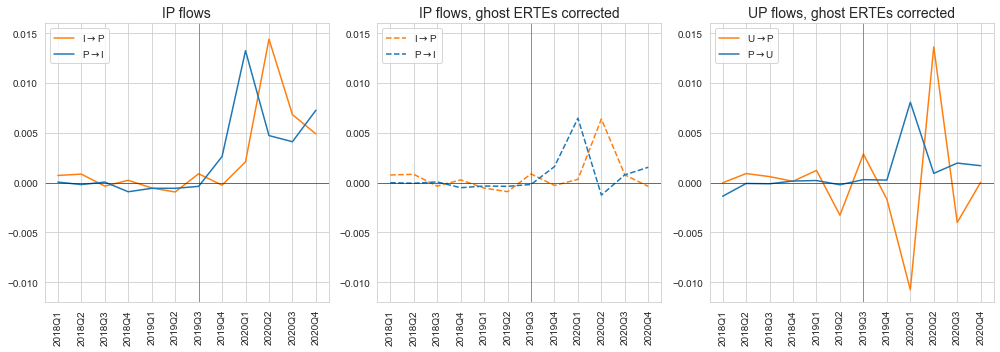

In [56]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(131)
plt.title(r'IP flows',fontsize=14)
plt.plot(flows_i['dates'].loc[t0:],flows_i['IP'].loc[t0:]-ip_flow_predict_20[t00:],
         c=colors[1],label=r'I$\rightarrow$P')
plt.plot(flows_i['dates'].loc[t0:],flows_p['PI'].loc[t0:]-pi_flow_predict_20[t00:],
         c=colors[0],label=r'P$\rightarrow$I')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.012,0.016)
plt.legend(loc='upper left')   

plt.subplot(132)
plt.title(r'IP flows, ghost ERTEs corrected',fontsize=14)
plt.plot(flows_i['dates'].loc[t0:],flows_i_alt['IP'].loc[t0:]-ip_flow_predict_20_alt[t00:],
         c=colors[1],ls='--',label=r'I$\rightarrow$P')
plt.plot(flows_i['dates'].loc[t0:],flows_p_alt['PI'].loc[t0:]-pi_flow_predict_20_alt[t00:],
         c=colors[0],ls='--',label=r'P$\rightarrow$I')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.012,0.016)
plt.legend(loc='upper left')  

plt.subplot(133)
plt.title(r'UP flows, ghost ERTEs corrected',fontsize=14)
plt.plot(flows_i['dates'].loc[t0:],flows_u_alt['UP'].loc[t0:]-up_flow_predict_20_alt[t00:],
         c=colors[1],label=r'U$\rightarrow$P')
plt.plot(flows_i['dates'].loc[t0:],flows_p_alt['PU'].loc[t0:]-pu_flow_predict_20_alt[t00:],
         c=colors[0],label=r'P$\rightarrow$U')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.012,0.016)
plt.legend(loc='upper left')  

plt.tight_layout()
# plt.savefig('./plots/twin_peaks.jpg',format='jpg',pil_kwargs={'quality':95})
# plt.savefig('./plots/spain_detrendflows_ip.pdf',format='pdf',bbox_inches='tight')
plt.show()

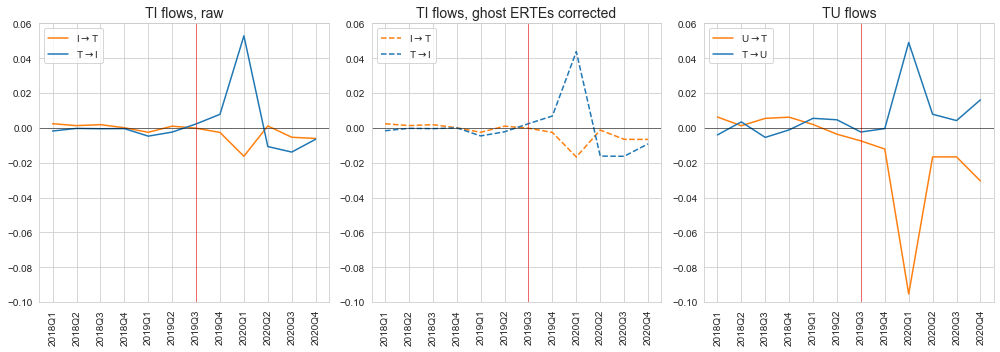

In [57]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(14,5))
plt.subplot(131)
plt.title(r'TI flows, raw',fontsize=14)
plt.plot(flows_i['dates'].loc[t0:],flows_i['IT'].loc[t0:]-it_flow_predict_20[t00:],
         c=colors[1],label=r'I$\rightarrow$T')
plt.plot(flows_i['dates'].loc[t0:],flows_t['TI'].loc[t0:]-ti_flow_predict_20[t00:],
         c=colors[0],label=r'T$\rightarrow$I')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.10,0.06)
plt.legend(loc='upper left')   

plt.subplot(132)
plt.title(r'TI flows, ghost ERTEs corrected',fontsize=14)
plt.plot(flows_i['dates'].loc[t0:],flows_i_alt['IT'].loc[t0:]-it_flow_predict_20_alt[t00:],
         c=colors[1],ls='--',label=r'I$\rightarrow$T')
plt.plot(flows_i['dates'].loc[t0:],flows_t_alt['TI'].loc[t0:]-ti_flow_predict_20_alt[t00:],
         c=colors[0],ls='--',label=r'T$\rightarrow$I')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.10,0.06)
plt.legend(loc='upper left')  

plt.subplot(133)
plt.title(r'TU flows',fontsize=14)
plt.plot(flows_i['dates'].loc[t0:],flows_u['UT'].loc[t0:]-ut_flow_predict_20[t00:],
         c=colors[1],label=r'U$\rightarrow$T')
plt.plot(flows_i['dates'].loc[t0:],flows_t_alt['TU'].loc[t0:]-tu_flow_predict_20_alt[t00:],
         c=colors[0],label=r'T$\rightarrow$U')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.10,0.06)
plt.legend(loc='upper left')  

plt.tight_layout()
# plt.savefig('./plots/twin_peaks.jpg',format='jpg',pil_kwargs={'quality':95})
plt.savefig('./plots/spain_detrendflows_it.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Raw flows

In [73]:
pi_flow_r_ltrend_20_m,pi_flow_r_predict_20_m = detrend_fuction(flows_p_m_raw,'PI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_r_ltrend_20_m_e,pi_flow_r_predict_20_m_e = detrend_fuction(flows_p_e_m_raw,'PI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_r_ltrend_20_m,ip_flow_r_predict_20_m = detrend_fuction(flows_i_m_raw,'IP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_r_ltrend_20_m_e,ip_flow_r_predict_20_m_e = detrend_fuction(flows_i_e_m_raw,'IP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_r_ltrend_20_m_e,pu_flow_r_predict_20_m_e = detrend_fuction(flows_p_e_m_raw,'PU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_r_ltrend_20_m,pu_flow_r_predict_20_m = detrend_fuction(flows_p_m_raw,'PU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [74]:
pi_flow_r_ltrend_20_f,pi_flow_r_predict_20_f = detrend_fuction(flows_p_f_raw,'PI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pi_flow_r_ltrend_20_f_e,pi_flow_r_predict_20_f_e = detrend_fuction(flows_p_e_f_raw,'PI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_r_ltrend_20_f,ip_flow_r_predict_20_f = detrend_fuction(flows_i_f_raw,'IP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ip_flow_r_ltrend_20_f_e,ip_flow_r_predict_20_f_e = detrend_fuction(flows_i_e_f_raw,'IP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_r_ltrend_20_f_e,pu_flow_r_predict_20_f_e = detrend_fuction(flows_p_e_f_raw,'PU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

pu_flow_r_ltrend_20_f,pu_flow_r_predict_20_f = detrend_fuction(flows_p_f_raw,'PU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [75]:
ti_flow_r_ltrend_20_m,ti_flow_r_predict_20_m = detrend_fuction(flows_t_m_raw,'TI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_r_ltrend_20_m_e,ti_flow_r_predict_20_m_e = detrend_fuction(flows_t_e_m_raw,'TI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_r_ltrend_20_m,it_flow_r_predict_20_m = detrend_fuction(flows_i_m_raw,'IT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_r_ltrend_20_m_e,it_flow_r_predict_20_m_e = detrend_fuction(flows_i_e_m_raw,'IT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_r_ltrend_20_m_e,tu_flow_r_predict_20_m_e = detrend_fuction(flows_t_e_m_raw,'TU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_r_ltrend_20_m,tu_flow_r_predict_20_m = detrend_fuction(flows_t_m_raw,'TU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [76]:
ti_flow_r_ltrend_20_f,ti_flow_r_predict_20_f = detrend_fuction(flows_t_f_raw,'TI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ti_flow_r_ltrend_20_f_e,ti_flow_r_predict_20_f_e = detrend_fuction(flows_t_e_f_raw,'TI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_r_ltrend_20_f,it_flow_r_predict_20_f = detrend_fuction(flows_i_f_raw,'IT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

it_flow_r_ltrend_20_f_e,it_flow_r_predict_20_f_e = detrend_fuction(flows_i_e_f_raw,'IT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_r_ltrend_20_f_e,tu_flow_r_predict_20_f_e = detrend_fuction(flows_t_e_f_raw,'TU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

tu_flow_r_ltrend_20_f,tu_flow_r_predict_20_f = detrend_fuction(flows_t_f_raw,'TU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

In [77]:
up_flow_r_ltrend_20_m,up_flow_r_predict_20_m = detrend_fuction(flows_u_m_raw,'UP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

up_flow_r_ltrend_20_m_e,up_flow_r_predict_20_m_e = detrend_fuction(flows_u_e_m_raw,'UP',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ut_flow_r_ltrend_20_m,ut_flow_r_predict_20_m = detrend_fuction(flows_u_m_raw,'UT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ut_flow_r_ltrend_20_m_e,ut_flow_r_predict_20_m_e = detrend_fuction(flows_u_e_m_raw,'UT',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_r_ltrend_20_m_e,iu_flow_r_predict_20_m_e = detrend_fuction(flows_i_e_m_raw,'IU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_r_ltrend_20_m,iu_flow_r_predict_20_m = detrend_fuction(flows_i_m_raw,'IU',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_r_ltrend_20_m_e,ui_flow_r_predict_20_m_e = detrend_fuction(flows_u_e_m_raw,'UI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_r_ltrend_20_m,ui_flow_r_predict_20_m = detrend_fuction(flows_u_m_raw,'UI',date_cuts_20_m,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


In [78]:
up_flow_r_ltrend_20_f,up_flow_r_predict_20_f = detrend_fuction(flows_u_f_raw,'UP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

up_flow_r_ltrend_20_f_e,up_flow_r_predict_20_f_e = detrend_fuction(flows_u_e_f_raw,'UP',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ut_flow_r_ltrend_20_f,ut_flow_r_predict_20_f = detrend_fuction(flows_u_f_raw,'UT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ut_flow_r_ltrend_20_f_e,ut_flow_r_predict_20_f_e = detrend_fuction(flows_u_e_f_raw,'UT',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_r_ltrend_20_f_e,iu_flow_r_predict_20_f_e = detrend_fuction(flows_i_e_f_raw,'IU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

iu_flow_r_ltrend_20_f,iu_flow_r_predict_20_f = detrend_fuction(flows_i_f_raw,'IU',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_r_ltrend_20_f_e,ui_flow_r_predict_20_f_e = detrend_fuction(flows_u_e_f_raw,'UI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)

ui_flow_r_ltrend_20_f,ui_flow_r_predict_20_f = detrend_fuction(flows_u_f_raw,'UI',date_cuts_20_f,
                                                 date0='2019Q4',dateT='2021Q1',date_dict=date_dict_reverse_ciclo)


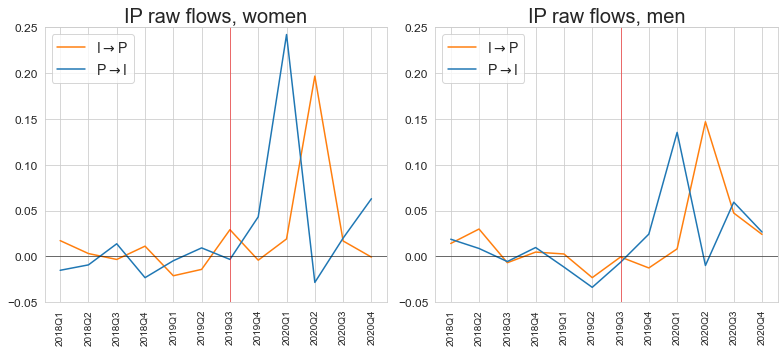

In [81]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.title(r'IP raw flows, women',fontsize=20)
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_f_raw['IP'].loc[t0:]-ip_flow_r_predict_20_f[t00:],
         c=colors[1],label=r'I$\rightarrow$P')
plt.plot(flows_i_f['dates'].loc[t0:],flows_p_f_raw['PI'].loc[t0:]-pi_flow_r_predict_20_f[t00:],
         c=colors[0],label=r'P$\rightarrow$I')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.05,0.25)
plt.legend(loc='upper left',fontsize=14) 
plt.yticks(fontsize=12)

plt.subplot(122)
plt.title(r'IP raw flows, men',fontsize=20)
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_m_raw['IP'].loc[t0:]-ip_flow_r_predict_20_m[t00:],
         c=colors[1],label=r'I$\rightarrow$P')
plt.plot(flows_i_m['dates'].loc[t0:],flows_p_m_raw['PI'].loc[t0:]-pi_flow_r_predict_20_m[t00:],
         c=colors[0],label=r'P$\rightarrow$I')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.05,0.25)
plt.legend(loc='upper left',fontsize=14)
plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('./plots/twin_peaks.jpg',format='jpg',pil_kwargs={'quality':95})
plt.savefig('./plots/flows_ip_sex_raw.pdf',format='pdf',bbox_inches='tight')
plt.show()

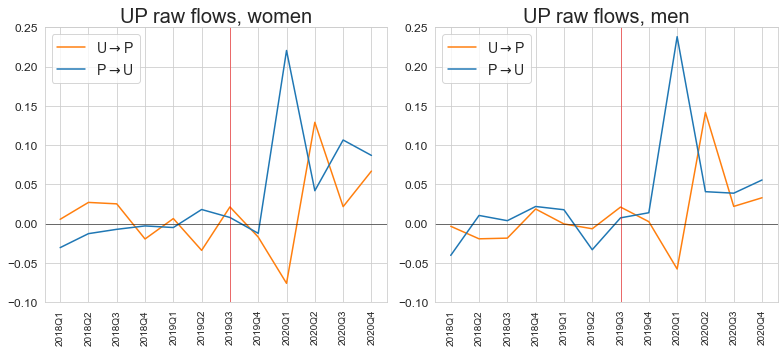

In [83]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.title(r'UP raw flows, women',fontsize=20)
plt.plot(flows_i_f['dates'].loc[t0:],flows_u_f_raw['UP'].loc[t0:]-up_flow_r_predict_20_f[t00:],
         c=colors[1],label=r'U$\rightarrow$P')
plt.plot(flows_i_f['dates'].loc[t0:],flows_p_f_raw['PU'].loc[t0:]-pu_flow_r_predict_20_f[t00:],
         c=colors[0],label=r'P$\rightarrow$U')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.1,0.25)
plt.legend(loc='upper left',fontsize=14)   
plt.yticks(fontsize=12)

plt.subplot(122)
plt.title(r'UP raw flows, men',fontsize=20)
plt.plot(flows_i_m['dates'].loc[t0:],flows_u_m_raw['UP'].loc[t0:]-up_flow_r_predict_20_m[t00:],
         c=colors[1],label=r'U$\rightarrow$P')
plt.plot(flows_i_m['dates'].loc[t0:],flows_p_m_raw['PU'].loc[t0:]-pu_flow_r_predict_20_m[t00:],
         c=colors[0],label=r'P$\rightarrow$U')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.1,0.25)
plt.legend(loc='upper left',fontsize=14)  
plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('./plots/twin_peaks.jpg',format='jpg',pil_kwargs={'quality':95})
plt.savefig('./plots/flows_up_sex_raw.pdf',format='pdf',bbox_inches='tight')
plt.show()

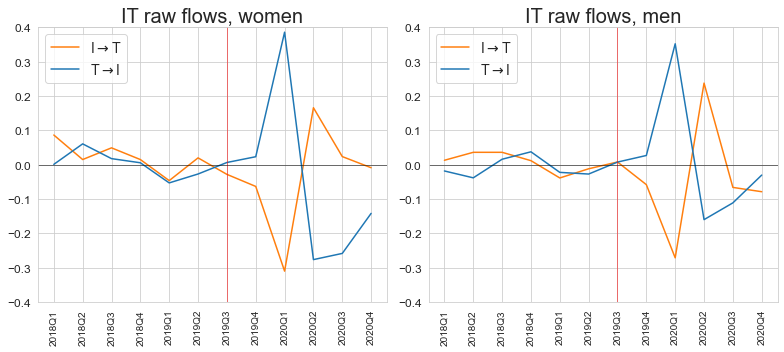

In [85]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.title(r'IT raw flows, women',fontsize=20)
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_f_raw['IT'].loc[t0:]-it_flow_r_predict_20_f[t00:],
         c=colors[1],label=r'I$\rightarrow$T')
plt.plot(flows_i_f['dates'].loc[t0:],flows_t_f_raw['TI'].loc[t0:]-ti_flow_r_predict_20_f[t00:],
         c=colors[0],label=r'T$\rightarrow$I')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.4,0.4)
plt.legend(loc='upper left',fontsize=14)  
plt.yticks(fontsize=12)

plt.subplot(122)
plt.title(r'IT raw flows, men',fontsize=20)
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_m_raw['IT'].loc[t0:]-it_flow_r_predict_20_m[t00:],
         c=colors[1],label=r'I$\rightarrow$T')
plt.plot(flows_i_m['dates'].loc[t0:],flows_t_m_raw['TI'].loc[t0:]-ti_flow_r_predict_20_m[t00:],
         c=colors[0],label=r'T$\rightarrow$I')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.4,0.4)
plt.legend(loc='upper left',fontsize=14)
plt.yticks(fontsize=12)


plt.tight_layout()
# plt.savefig('./plots/twin_peaks.jpg',format='jpg',pil_kwargs={'quality':95})
plt.savefig('./plots/flows_it_sex_raw.pdf',format='pdf',bbox_inches='tight')
plt.show()

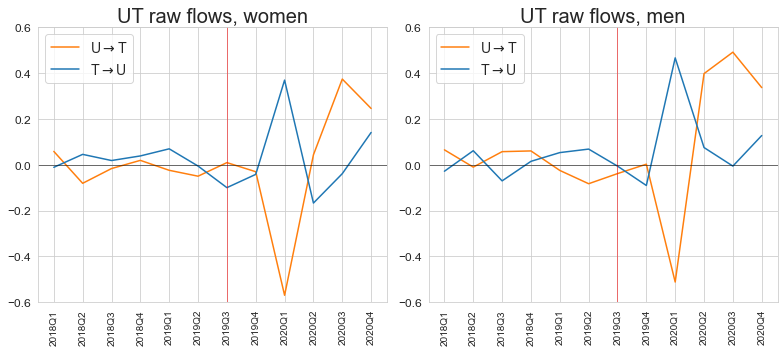

In [87]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.title(r'UT raw flows, women',fontsize=20)
plt.plot(flows_i_f['dates'].loc[t0:],flows_u_f_raw['UT'].loc[t0:]-ut_flow_r_predict_20_f[t00:],
         c=colors[1],label=r'U$\rightarrow$T')
plt.plot(flows_i_f['dates'].loc[t0:],flows_t_f_raw['TU'].loc[t0:]-tu_flow_r_predict_20_f[t00:],
         c=colors[0],label=r'T$\rightarrow$U')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.6,0.6)
plt.legend(loc='upper left',fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(122)
plt.title(r'UT raw flows, men',fontsize=20)
plt.plot(flows_i_m['dates'].loc[t0:],flows_u_m_raw['UT'].loc[t0:]-ut_flow_r_predict_20_m[t00:],
         c=colors[1],label=r'U$\rightarrow$T')
plt.plot(flows_i_m['dates'].loc[t0:],flows_t_m_raw['TU'].loc[t0:]-tu_flow_r_predict_20_m[t00:],
         c=colors[0],label=r'T$\rightarrow$U')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.6,0.6)
plt.legend(loc='upper left',fontsize=14)
plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('./plots/twin_peaks.jpg',format='jpg',pil_kwargs={'quality':95})
plt.savefig('./plots/flows_ut_sex_raw.pdf',format='pdf',bbox_inches='tight')
plt.show()

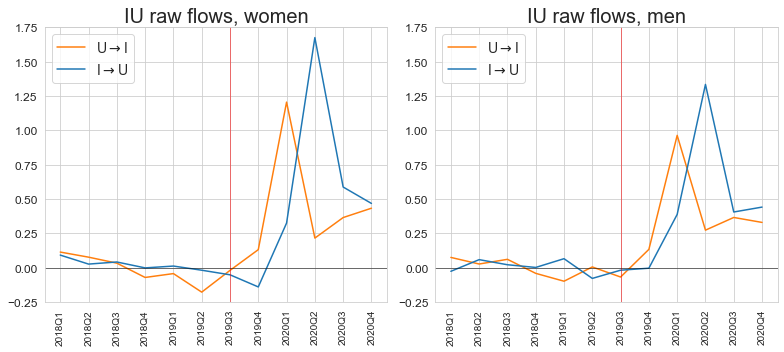

In [89]:
t0 = date_dict_reverse_ciclo['2018Q1']
t00 = t0 - date_dict_reverse_ciclo['2016Q1']
T = date_dict_reverse_ciclo['2020Q4']-t0
dt_boom = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2019Q4'])
dt_bot = T - (date_dict_reverse_ciclo['2021Q1']-date_dict_reverse_ciclo['2020Q2'])
colors = sn.color_palette()

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.title(r'IU raw flows, women',fontsize=20)
plt.plot(flows_i_f['dates'].loc[t0:],flows_u_f_raw['UI'].loc[t0:]-ui_flow_r_predict_20_f[t00:],
         c=colors[1],label=r'U$\rightarrow$I')
plt.plot(flows_i_f['dates'].loc[t0:],flows_i_f_raw['IU'].loc[t0:]-iu_flow_r_predict_20_f[t00:],
         c=colors[0],label=r'I$\rightarrow$U')
plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.25,1.75)
plt.legend(loc='upper left',fontsize=14)   
plt.yticks(fontsize=12)

plt.subplot(122)
plt.title(r'IU raw flows, men',fontsize=20)
plt.plot(flows_i_m['dates'].loc[t0:],flows_u_m_raw['UI'].loc[t0:]-ui_flow_r_predict_20_m[t00:],
         c=colors[1],label=r'U$\rightarrow$I')
plt.plot(flows_i_m['dates'].loc[t0:],flows_i_m_raw['IU'].loc[t0:]-iu_flow_r_predict_20_m[t00:],
         c=colors[0],label=r'I$\rightarrow$U')

plt.xticks(rotation=90)
plt.axvline(dt_boom,c='r',lw=0.5)
plt.axhline(c='k',lw=0.5)
plt.ylim(-0.25,1.75)
plt.legend(loc='upper left',fontsize=14) 
plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('./plots/twin_peaks.jpg',format='jpg',pil_kwargs={'quality':95})
plt.savefig('./plots/flows_iu_sex_raw.pdf',format='pdf',bbox_inches='tight')
plt.show()